In [1]:
#This dataset is sourced from https://data.nasa.gov/

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Fireball_And_Bolide_Reports.csv")
df.head()

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [4]:
df.shape
#92 rows and 10 columns

(92, 10)

In [5]:
df.info()
#lattitude and longitude are obj types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date/Time - Peak Brightness (UT)     92 non-null     object 
 1   Latitude (Deg)                       92 non-null     object 
 2   Longitude (Deg)                      92 non-null     object 
 3   Altitude (km)                        68 non-null     float64
 4   Velocity (km/s)                      7 non-null      float64
 5   Velocity Components (km/s): vx       52 non-null     float64
 6   Velocity Components (km/s): vy       52 non-null     float64
 7   Velocity Components (km/s): vz       52 non-null     float64
 8   Total Radiated Energy (J)            92 non-null     int64  
 9   Calculated Total Impact Energy (kt)  92 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.3+ KB


In [6]:
df.isnull().sum()

Date/Time - Peak Brightness (UT)        0
Latitude (Deg)                          0
Longitude (Deg)                         0
Altitude (km)                          24
Velocity (km/s)                        85
Velocity Components (km/s): vx         40
Velocity Components (km/s): vy         40
Velocity Components (km/s): vz         40
Total Radiated Energy (J)               0
Calculated Total Impact Energy (kt)     0
dtype: int64

In [7]:
#for the purpose of this analysis, we will be mapping the individual recorded fireballs and bolides using lat and long
#total radiated energy
df = df.drop(["Altitude (km)", "Velocity (km/s)", "Velocity Components (km/s): vx", "Velocity Components (km/s): vy", "Velocity Components (km/s): vz"], axis="columns")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date/Time - Peak Brightness (UT)     92 non-null     object 
 1   Latitude (Deg)                       92 non-null     object 
 2   Longitude (Deg)                      92 non-null     object 
 3   Total Radiated Energy (J)            92 non-null     int64  
 4   Calculated Total Impact Energy (kt)  92 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ KB


In [8]:
#we can see that date/time column is an object
df["Date/Time - Peak Brightness (UT)"] =  pd.to_datetime(df["Date/Time - Peak Brightness (UT)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date/Time - Peak Brightness (UT)     92 non-null     datetime64[ns]
 1   Latitude (Deg)                       92 non-null     object        
 2   Longitude (Deg)                      92 non-null     object        
 3   Total Radiated Energy (J)            92 non-null     int64         
 4   Calculated Total Impact Energy (kt)  92 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.7+ KB


In [9]:
df.sort_values("Total Radiated Energy (J)", ascending = False)

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Total Radiated Energy (J),Calculated Total Impact Energy (kt)
23,2013-02-15 03:20:33,54.8N,61.1E,375000000000000,440.000
14,2010-12-25 23:24:00,38.0N,158.0E,20000000000000,33.000
25,2009-10-08 02:57:00,4.2S,120.6E,20000000000000,33.000
0,2009-11-21 20:53:00,22.0S,29.2E,10000000000000,18.000
44,2013-04-30 08:40:38,35.5N,30.7W,5110000000000,10.000
...,...,...,...,...,...
38,2015-01-09 17:31:47,23.3S,49.2W,22000000000,0.079
13,2013-07-26 11:32:26,21.0N,178.5W,20000000000,0.073
65,2013-05-14 23:20:21,3.0S,76.4E,20000000000,0.073
55,2015-03-08 04:26:28,39.1S,118.6W,20000000000,0.073


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Calculated Total Impact Energy (kt)')

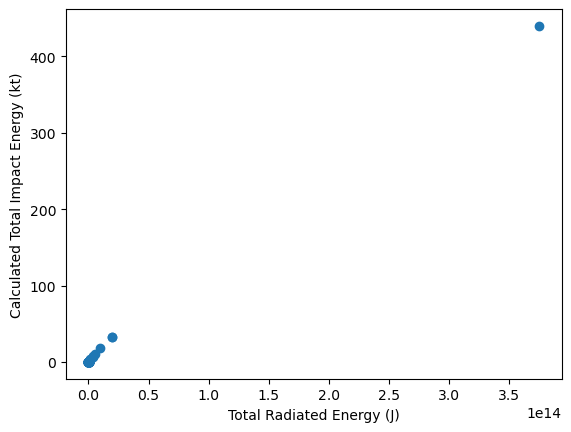

In [11]:
plt.scatter(df["Total Radiated Energy (J)"], df["Calculated Total Impact Energy (kt)"])
plt.xlabel("Total Radiated Energy (J)")
plt.ylabel("Calculated Total Impact Energy (kt)")
#total radiated energy and calculated total impact energy is linearly correlated

In [12]:
#convert total radiated energy unit from joules to billions joules (giga joules) for easier visualization
df["Total Radiated Energy (giga J)"] = df["Total Radiated Energy (J)"]/1000000000
df.drop(["Total Radiated Energy (J)"], axis="columns", inplace=True)
df

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Calculated Total Impact Energy (kt),Total Radiated Energy (giga J)
0,2009-11-21 20:53:00,22.0S,29.2E,18.00,10000.0
1,2015-01-09 10:41:11,2.0N,28.8E,0.41,139.0
2,2014-05-16 12:42:48,44.2S,176.2W,0.82,309.0
3,2014-08-23 06:29:41,61.7S,132.6E,7.60,3820.0
4,2014-12-12 06:48:11,33.5N,144.9E,0.11,33.0
...,...,...,...,...,...
87,2012-05-04 21:54:49,76.7N,10.6W,0.63,229.0
88,2012-04-23 22:01:10,36.2N,107.4E,0.15,44.0
89,2012-07-25 07:48:20,36.4N,41.5E,0.39,133.0
90,2015-04-21 01:42:51,37.7N,39.6W,0.27,88.0


Text(0, 0.5, 'Occurence')

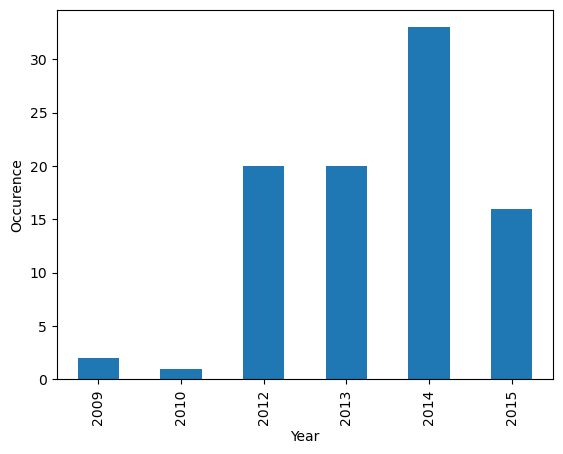

In [13]:
#count occurences per year and plot bar chart
df["Date/Time - Peak Brightness (UT)"].groupby(df["Date/Time - Peak Brightness (UT)"].dt.year).count().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Occurence")